In [3]:
import pandas as pd
import numpy as np
from prophet import Prophet

In [4]:
data = pd.read_csv("/Users/vic/Desktop/Sales_Forecast/Data/Sample - Superstore.csv",
                   encoding="cp1252")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         1043 non-null   int64  
 1   Order ID       1043 non-null   object 
 2   Order Date     1043 non-null   object 
 3   Ship Date      1043 non-null   object 
 4   Ship Mode      1043 non-null   object 
 5   Customer ID    1043 non-null   object 
 6   Customer Name  1043 non-null   object 
 7   Segment        1043 non-null   object 
 8   Country        1043 non-null   object 
 9   City           1043 non-null   object 
 10  State          1043 non-null   object 
 11  Postal Code    1043 non-null   int64  
 12  Region         1043 non-null   object 
 13  Product ID     1043 non-null   object 
 14  Category       1043 non-null   object 
 15  Sub-Category   1043 non-null   object 
 16  Product Name   1043 non-null   object 
 17  Sales          1042 non-null   float64
 18  Quantity

In [11]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,1043.000000,1043.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,529.786194,53185.780441,243.811622,3.805182,0.161017,20.984042
std,402.608593,31635.293892,593.008666,2.271118,0.208084,223.957026
min,1.000000,1841.000000,1.080000,1.000000,0.000000,-3839.990400
25%,261.500000,19143.000000,18.294000,2.000000,0.000000,1.935900
50%,522.000000,50315.000000,55.986000,3.000000,0.200000,8.765100
75%,782.500000,85023.000000,212.850750,5.000000,0.200000,28.101300
max,9164.000000,98661.000000,8159.952000,14.000000,0.800000,3177.475000


In [6]:
data=data.dropna(subset=['Sales','Quantity','Discount','Profit'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1042 entries, 0 to 1041
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         1042 non-null   int64  
 1   Order ID       1042 non-null   object 
 2   Order Date     1042 non-null   object 
 3   Ship Date      1042 non-null   object 
 4   Ship Mode      1042 non-null   object 
 5   Customer ID    1042 non-null   object 
 6   Customer Name  1042 non-null   object 
 7   Segment        1042 non-null   object 
 8   Country        1042 non-null   object 
 9   City           1042 non-null   object 
 10  State          1042 non-null   object 
 11  Postal Code    1042 non-null   int64  
 12  Region         1042 non-null   object 
 13  Product ID     1042 non-null   object 
 14  Category       1042 non-null   object 
 15  Sub-Category   1042 non-null   object 
 16  Product Name   1042 non-null   object 
 17  Sales          1042 non-null   float64
 18  Quantity     

In [8]:
data['Order Date']=pd.to_datetime(data['Order Date'], errors='coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1042 entries, 0 to 1041
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         1042 non-null   int64         
 1   Order ID       1042 non-null   object        
 2   Order Date     1042 non-null   datetime64[ns]
 3   Ship Date      1042 non-null   object        
 4   Ship Mode      1042 non-null   object        
 5   Customer ID    1042 non-null   object        
 6   Customer Name  1042 non-null   object        
 7   Segment        1042 non-null   object        
 8   Country        1042 non-null   object        
 9   City           1042 non-null   object        
 10  State          1042 non-null   object        
 11  Postal Code    1042 non-null   int64         
 12  Region         1042 non-null   object        
 13  Product ID     1042 non-null   object        
 14  Category       1042 non-null   object        
 15  Sub-Category   1042 non-nu

In [10]:
monthly_data=data.set_index('Order Date').resample('ME')['Sales'].sum().reset_index()

In [11]:
monthly_data.head()

,Order Date,Sales
0,2014-01-31,1980.598
1,2014-02-28,713.828
2,2014-03-31,861.262
3,2014-04-30,787.668
4,2014-05-31,5167.144


In [12]:
ts=monthly_data.rename(columns={'Order Date':'ds','Sales':'y'})

In [13]:
ts.head()

,ds,y
0,2014-01-31,1980.598
1,2014-02-28,713.828
2,2014-03-31,861.262
3,2014-04-30,787.668
4,2014-05-31,5167.144


In [14]:
m_total=Prophet()
m_total.fit(ts)

19:42:34 - cmdstanpy - INFO - Chain [1] start processing
19:42:34 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future_prediction=m_total.make_future_dataframe(periods=12,freq='ME')
forecast_total = m_total.predict(future_prediction)

In [16]:
forecast_total.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-31,4891.965088,788.144151,7910.480889,4891.965088,4891.965088,-602.433170,-602.433170,-602.433170,-602.433170,-602.433170,-602.433170,0.0,0.0,0.0,4289.531917
1,2014-02-28,4885.217999,-2574.018437,4756.840467,4885.217999,4885.217999,-3748.301805,-3748.301805,-3748.301805,-3748.301805,-3748.301805,-3748.301805,0.0,0.0,0.0,1136.916194
2,2014-03-31,4877.748009,1020.186025,8138.454670,4877.748009,4877.748009,-332.457052,-332.457052,-332.457052,-332.457052,-332.457052,-332.457052,0.0,0.0,0.0,4545.290957
3,2014-04-30,4870.518986,409.461485,7586.340639,4870.518986,4870.518986,-997.153120,-997.153120,-997.153120,-997.153120,-997.153120,-997.153120,0.0,0.0,0.0,3873.365865
4,2014-05-31,4863.048995,345.844066,7198.242375,4863.048995,4863.048995,-1232.257386,-1232.257386,-1232.257386,-1232.257386,-1232.257386,-1232.257386,0.0,0.0,0.0,3630.791609


In [20]:
export_data=forecast_total[['ds','yhat']].merge(ts, on='ds',how='left').rename(columns={'y':'Actual Sales','yhat':'Forecast Sales'})

In [21]:
export_data.head()

,ds,Forecast Sales,Actual Sales
0,2014-01-31,4289.531917,1980.598
1,2014-02-28,1136.916194,713.828
2,2014-03-31,4545.290957,861.262
3,2014-04-30,3873.365865,787.668
4,2014-05-31,3630.791609,5167.144


In [22]:
export_data

,ds,Forecast Sales,Actual Sales
0,2014-01-31,4289.531917,1980.5980
1,2014-02-28,1136.916194,713.8280
2,2014-03-31,4545.290957,861.2620
3,2014-04-30,3873.365865,787.6680
4,2014-05-31,3630.791609,5167.1440
5,2014-06-30,5549.707365,11314.3310
6,2014-07-31,3830.952502,4294.9500
7,2014-08-31,3929.368614,3721.5820
8,2014-09-30,12954.973122,20445.0640
9,2014-10-31,4588.404237,4766.8700


In [23]:
export_data['type'] = export_data['Actual Sales'].notna().map(
    {True: 'Actual', False: 'Forecast'}
)

In [24]:
export_data['level'] = 'Total'

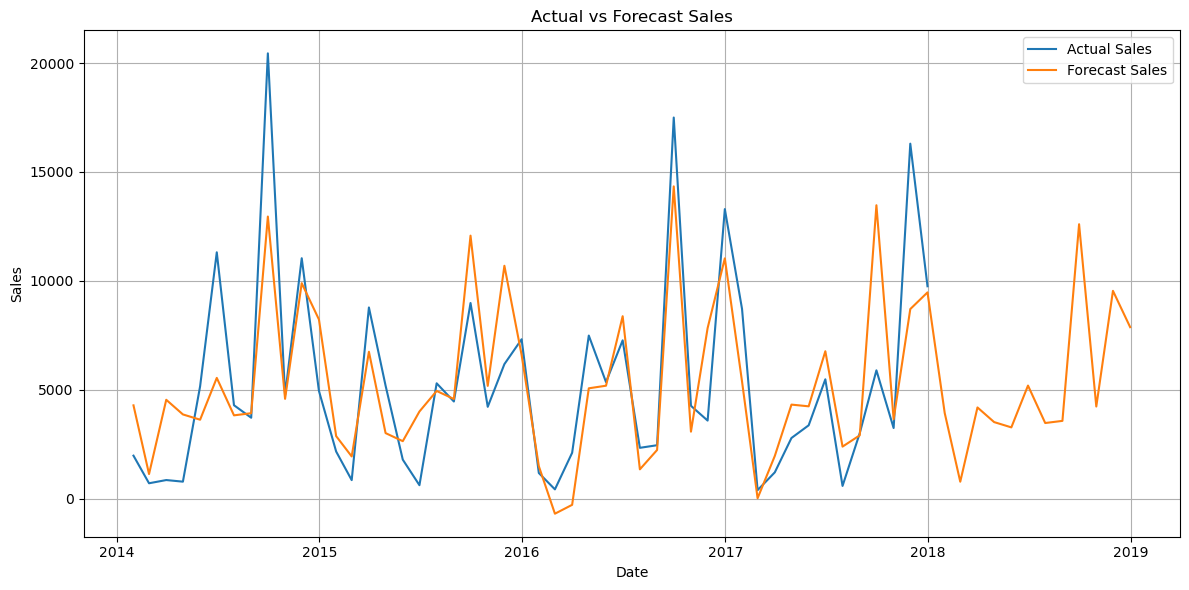

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(export_data['ds'], export_data['Actual Sales'], label='Actual Sales')
plt.plot(export_data['ds'], export_data['Forecast Sales'], label='Forecast Sales')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Forecast Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [47]:
export_data.to_csv('/Users/vic/Desktop/Sales_Forecast/Data/forecast_table.csv',index=False)

In [28]:
categories=data['Category'].unique()
categories

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [29]:
all_cat_exports = []
for cat in categories:
    data_cat=data[data['Category']==cat]
    monthly_sales=data_cat.set_index('Order Date').resample('ME')['Sales'].sum().reset_index().rename(columns={'Order Date':'ds','Sales':'y'})
    m_total=Prophet()
    m_total.fit(monthly_sales)
    forecast_df=m_total.make_future_dataframe(periods=12,freq='ME')
    forecast_data=m_total.predict(forecast_df)
    export_data=forecast_data[['ds','yhat']].merge(monthly_sales,on='ds',how='left').rename(columns={'yhat':'Forecated','y':'Actual Sales'})
    export_data['type'] = export_data['Actual Sales'].notna().map(
        {True: 'Actual', False: 'Forecast'}
    )
    export_data['level'] = f"Category - {cat}"
    all_cat_exports.append(export_data)

final_cat_df = pd.concat(all_cat_exports)
final_cat_df.to_csv('/Users/vic/Desktop/Sales_Forecast/Data/category_table.csv', index=False)

19:46:44 - cmdstanpy - INFO - Chain [1] start processing
19:46:44 - cmdstanpy - INFO - Chain [1] done processing
19:46:44 - cmdstanpy - INFO - Chain [1] start processing
19:46:44 - cmdstanpy - INFO - Chain [1] done processing
19:46:44 - cmdstanpy - INFO - Chain [1] start processing
19:46:44 - cmdstanpy - INFO - Chain [1] done processing


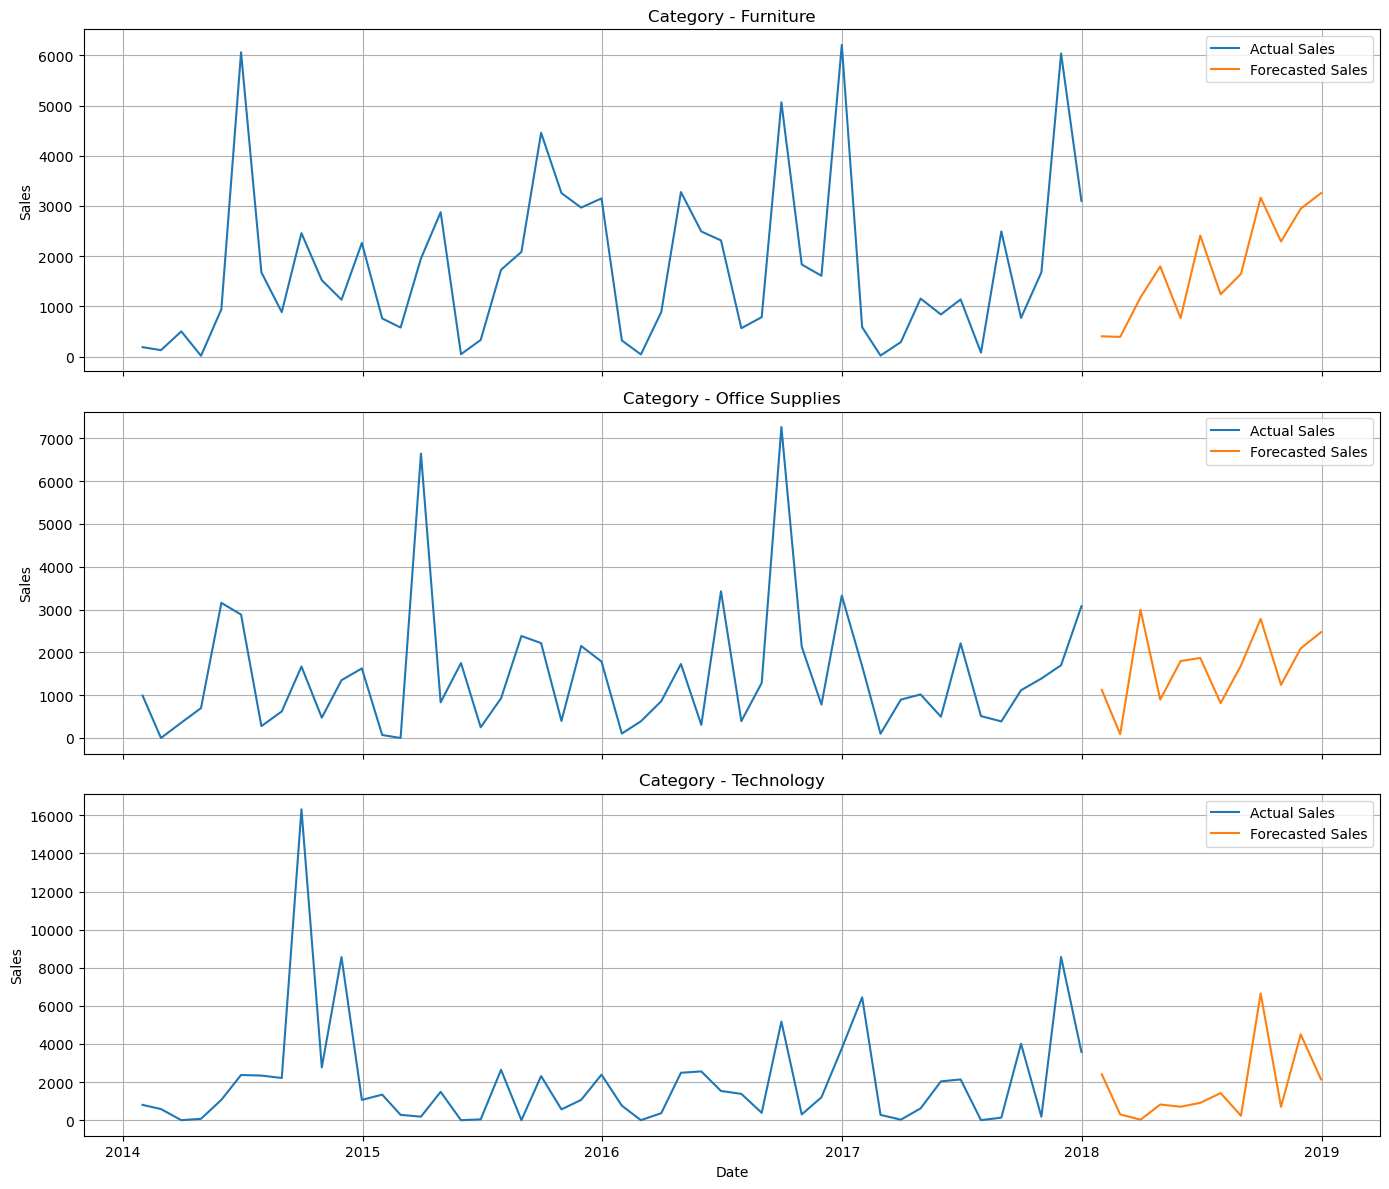

In [32]:
import matplotlib.pyplot as plt

categories = final_cat_df['level'].unique()

fig, axes = plt.subplots(len(categories), 1, figsize=(14, 4 * len(categories)), sharex=True)

# If only one category, make axes iterable
if len(categories) == 1:
    axes = [axes]

for ax, (cat, df) in zip(axes, final_cat_df.groupby('level')):
    
    # Actual Sales
    actual = df[df['type'] == 'Actual']
    ax.plot(actual['ds'], actual['Actual Sales'], label='Actual Sales')
    
    # Forecast Sales
    forecast = df[df['type'] == 'Forecast']
    ax.plot(forecast['ds'], forecast['Forecated'], label='Forecasted Sales')
    
    ax.set_title(cat)
    ax.set_ylabel('Sales')
    ax.legend()
    ax.grid(True)

axes[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [34]:
Regions=data['Region'].unique()
Regions

array(['South', 'West', 'Central', 'East'], dtype=object)

In [35]:
all_cat_exports = []
for cat in Regions:
    data_cat=data[data['Region']==cat]
    monthly_sales=data_cat.set_index('Order Date').resample('ME')['Sales'].sum().reset_index().rename(columns={'Order Date':'ds','Sales':'y'})
    m_total=Prophet()
    m_total.fit(monthly_sales)
    forecast_df=m_total.make_future_dataframe(periods=12,freq='ME')
    forecast_data=m_total.predict(forecast_df)
    export_data=forecast_data[['ds','yhat']].merge(monthly_sales,on='ds',how='left').rename(columns={'yhat':'Forecated','y':'Actual Sales'})
    export_data['type'] = export_data['Actual Sales'].notna().map(
        {True: 'Actual', False: 'Forecast'}
    )
    export_data['level'] = f"Category - {cat}"
    all_cat_exports.append(export_data)

final_cat_df = pd.concat(all_cat_exports)
final_cat_df.to_csv('/Users/vic/Desktop/Sales_Forecast/Data/Region_table.csv', index=False)

19:48:55 - cmdstanpy - INFO - Chain [1] start processing
19:48:56 - cmdstanpy - INFO - Chain [1] done processing
19:48:56 - cmdstanpy - INFO - Chain [1] start processing
19:48:56 - cmdstanpy - INFO - Chain [1] done processing
19:48:56 - cmdstanpy - INFO - Chain [1] start processing
19:48:56 - cmdstanpy - INFO - Chain [1] done processing
19:48:56 - cmdstanpy - INFO - Chain [1] start processing
19:48:56 - cmdstanpy - INFO - Chain [1] done processing


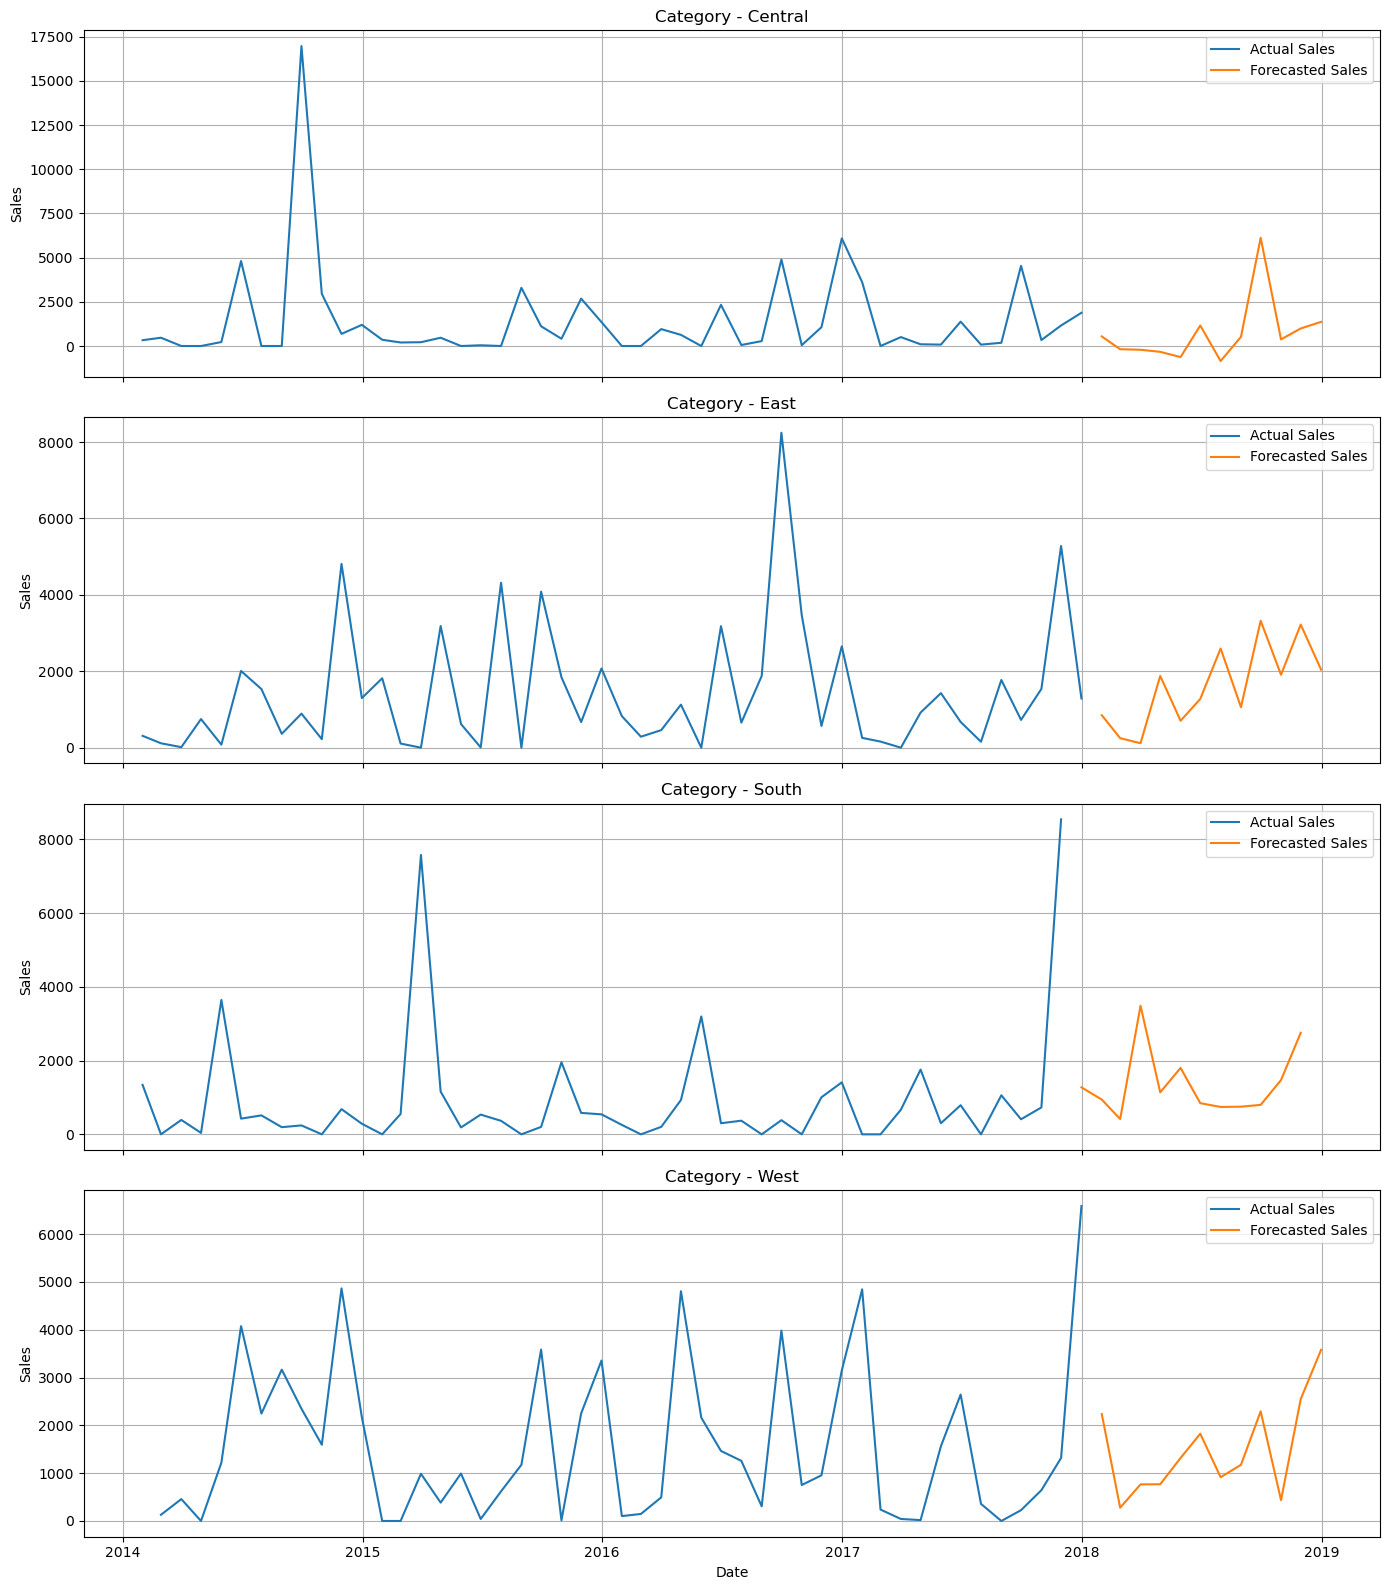

In [36]:
import matplotlib.pyplot as plt

regions = final_cat_df['level'].unique()

fig, axes = plt.subplots(
    nrows=len(regions),
    ncols=1,
    figsize=(14, 4 * len(regions)),
    sharex=True
)

# Handle case when there is only one region
if len(regions) == 1:
    axes = [axes]

for ax, (region, df) in zip(axes, final_cat_df.groupby('level')):
    
    # Actual Sales
    actual = df[df['type'] == 'Actual']
    ax.plot(actual['ds'], actual['Actual Sales'], label='Actual Sales')
    
    # Forecast Sales
    forecast = df[df['type'] == 'Forecast']
    ax.plot(forecast['ds'], forecast['Forecated'], label='Forecasted Sales')
    
    ax.set_title(region)
    ax.set_ylabel('Sales')
    ax.legend()
    ax.grid(True)

axes[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()